<a href="https://colab.research.google.com/github/Nawshhh/machine-learning-practice/blob/main/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [123]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # 1) Input layer (4 features of the flower)
  # 2) Hidden Layer1 (Number of neurons)
  # 3) Hidden Layer3 (n)
  # 4) output either of the three classes of iris flowers
  def __init__(self, input_features=4, h1=8, h2=8, output_features=3):
    super().__init__()
    self.fc1 = nn.Linear(input_features, h1) # connection to hidden layers
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, output_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [124]:
# pick a seed for randomization
torch.manual_seed(5)

# create an instance of model
model = Model()

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [126]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [127]:
my_df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [128]:
# Quantify the classes
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)
my_df

/tmp/ipython-input-2961123984.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [129]:
# Train-Test-Split
# Split X and y

X = my_df.drop('variety', axis=1)
y = my_df['variety']

In [130]:
# Convert to numpy

X = X.values
y = y.values

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [133]:
# Convert X features to float tesnsors

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [134]:
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [135]:
# Set the criterion of model to measure the error
# how far off the prediction are from the data
criterion = nn.CrossEntropyLoss()

# choose Adam Optimizer
# set learning rate (if error doesn't go down after iterations (epochs), lower learning rate)
# (lower learning rate means longer training)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [136]:
# Train the Model
# Epoch = one run thru all the training data in our network
epochs = 100
losses = []
for i in range(epochs):
  # forward propagation
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss/error, going to be high at first
  loss = criterion(y_pred, y_train) # predicted vs actual

  # Keep track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it back
  # to the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.1047687530517578
Epoch: 10 and loss: 0.871768593788147
Epoch: 20 and loss: 0.6225903034210205
Epoch: 30 and loss: 0.44940251111984253
Epoch: 40 and loss: 0.3214559257030487
Epoch: 50 and loss: 0.20679324865341187
Epoch: 60 and loss: 0.12511955201625824
Epoch: 70 and loss: 0.08340632170438766
Epoch: 80 and loss: 0.06503161787986755
Epoch: 90 and loss: 0.05630595609545708


Text(0.5, 0, 'Epoch')

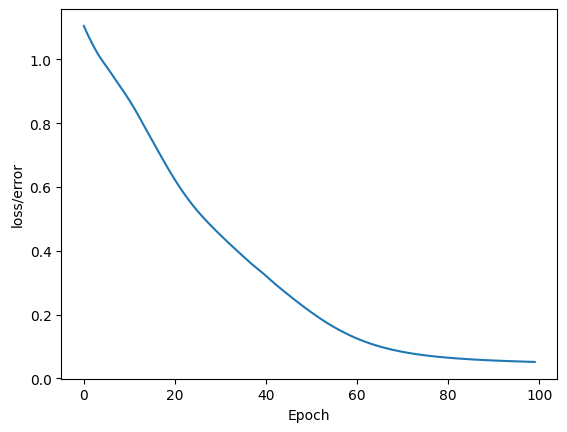

In [137]:
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')

In [138]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad(): #Basically turn off back propagation
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test) # Find the loss or error

In [139]:
loss

tensor(0.1075)

In [140]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    # What type of flower class our network thinks
    print(f'{i + 1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f'Number of Correct: {correct}')

1.) tensor([-2.5537,  3.5634, -2.5975]) 	 1 	 1
2.) tensor([-9.7706, -0.7088,  4.6093]) 	 2 	 2
3.) tensor([-11.2119,  -1.8456,   6.1753]) 	 2 	 2
4.) tensor([  8.3862,   2.5669, -11.0579]) 	 0 	 0
5.) tensor([-12.1396,  -1.3567,   6.0982]) 	 2 	 2
6.) tensor([-1.3036,  3.0803, -3.0355]) 	 1 	 1
7.) tensor([  8.5468,   2.7395, -11.4503]) 	 0 	 0
8.) tensor([-6.8159,  1.1204,  1.6583]) 	 1 	 2
9.) tensor([  7.9592,   2.8024, -11.0093]) 	 0 	 0
10.) tensor([-5.5480,  1.4608,  0.7915]) 	 1 	 1
11.) tensor([-5.3217,  1.8808,  0.3711]) 	 1 	 1
12.) tensor([-7.4018,  1.2545,  1.9268]) 	 2 	 2
13.) tensor([-11.1762,  -0.7931,   5.2232]) 	 2 	 2
14.) tensor([-11.6709,  -1.0588,   5.6537]) 	 2 	 2
15.) tensor([  8.3827,   2.7650, -11.3383]) 	 0 	 0
16.) tensor([  7.5923,   2.8570, -10.7557]) 	 0 	 0
17.) tensor([-7.7856,  1.0286,  2.2786]) 	 2 	 2
18.) tensor([-11.2209,  -0.6164,   5.0822]) 	 2 	 2
19.) tensor([  9.2625,   2.8154, -12.2058]) 	 0 	 0
20.) tensor([  8.6273,   2.6754, -11.4311]) 	

In [141]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [142]:
iris_dict = {0: 'Setosa', 1: 'Veriscolor', 2: 'Virginica'}

with torch.no_grad():
  result = model(new_iris).argmax().item()
  print(f'Classified Flower: {iris_dict[result]}')

Classified Flower: Setosa


In [143]:
# Save the NN model
torch.save(model.state_dict(), 'nn_iris_model.pt')

In [144]:
# Load the saved model
new_model = Model()
new_model.load_state_dict(torch.load('nn_iris_model.pt'))

<All keys matched successfully>

In [145]:
# Make sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=3, bias=True)
)